In [ ]:
#Mounting to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/ICPS PROJECT/ICPS Project Dataset'

/content/drive/MyDrive/ICPS PROJECT/ICPS Project Dataset



Training...

Found 1212 images belonging to 7 classes.
Found 300 images belonging to 7 classes.
Epoch 1/20
101/101 [==============================] - ETA: 0s - loss: 1.7099 - accuracy: 0.3028

101/101 [==============================] - 171s 2s/step - loss: 1.7099 - accuracy: 0.3028 - val_loss: 1.4768 - val_accuracy: 0.4300
Epoch 2/20
101/101 [==============================] - 16s 163ms/step - loss: 1.3586 - accuracy: 0.4596
Epoch 3/20
101/101 [==============================] - 15s 145ms/step - loss: 1.1317 - accuracy: 0.5611
Epoch 4/20
101/101 [==============================] - 15s 146ms/step - loss: 0.9556 - accuracy: 0.6469
Epoch 5/20
101/101 [==============================] - 17s 163ms/step - loss: 0.8877 - accuracy: 0.6939
Epoch 6/20
101/101 [==============================] - 15s 145ms/step - loss: 0.6912 - accuracy: 0.7607
Epoch 7/20
101/101 [==============================] - 15s 146ms/step - loss: 0.6675 - accuracy: 0.7855
Epoch 8/20
101/101 [==============================] - 16s 162ms/step - loss: 0.6030 - accuracy: 0.7946
Epoch 9/20
101/101 [==============================] - 15s 144ms/step - loss: 0.5678 - accuracy: 0.8069
Epoch 10/20
101/101 [=======================

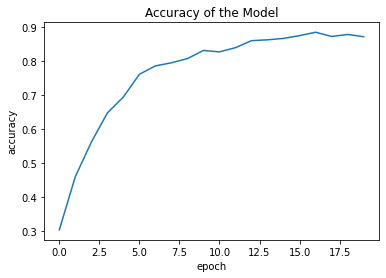

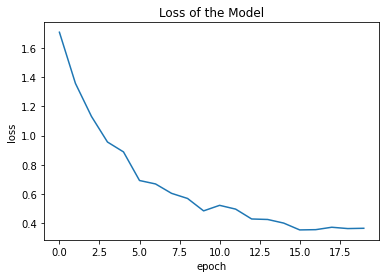

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model_classification = Sequential() #CNN initializtion

model_classification.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu')) #layer 1
model_classification.add(MaxPooling2D(pool_size = (2, 2)))

model_classification.add(Convolution2D(32,(3,3), activation = 'relu')) #layer 2
model_classification.add(MaxPooling2D(pool_size = (2, 2)))


model_classification.add(Flatten()) #Flattening layers


model_classification.add(Dense(units=32, activation = 'relu'))
model_classification.add(Dense(units=64, activation = 'relu'))
model_classification.add(Dense(units=128,activation = 'relu'))
model_classification.add(Dense(units=256,activation = 'relu'))
model_classification.add(Dense(units=256,activation = 'relu'))
model_classification.add(Dense(units=7,activation = 'softmax'))

model_classification.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #Compiling CNN

#Fitting CNN on training and testing images
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True) 
test_data = ImageDataGenerator(rescale = 1./255)

print("\nTraining...\n")

training_set = train_data.flow_from_directory('train', target_size=(64,64), batch_size=12, class_mode='categorical')
#batch size must be selected in such a way that it is a divisor of no.of training images.
testing_set = test_data.flow_from_directory('test', target_size=(64,64), batch_size=12, class_mode='categorical') 
#class mode is categorical since 3 things are being classified.

history = model_classification.fit(training_set, steps_per_epoch = 101, epochs = 20, validation_data = testing_set, validation_steps = 300) 
# steps_per_epoch = Total training images / batch_size, validation_steps = Total testing images
#Graphs
history.history.keys()

plt.plot(history.history['accuracy'])
plt.title('Accuracy of the Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss of the Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

model_classification.save("model1.h5")